# Cluster Analysis in R

> build a strong intuition for how they work and how to interpret hierarchical clustering and k-means clustering results

- author: Victor Omondi
- toc: true
- comments: true
- categories: [machine-learning, cluster-analysis, r]
- image: images/cl-r-shield.png

# Overview

Cluster analysis is a powerful toolkit in the data science workbench. It is used to find groups of observations (clusters) that share similar characteristics. These similarities can inform all kinds of business decisions; for example, in marketing, it is used to identify distinct groups of customers for which advertisements can be tailored. We will explore two commonly used clustering methods - hierarchical clustering and k-means clustering. We'll build a strong intuition for how they work and how to interpret their results. We'll develop this intuition by exploring three different datasets: soccer player positions, wholesale customer spending data, and longitudinal occupational wage data.

# Libraries

In [27]:
library(dplyr)
library(ggplot2)
library(dummies)
library(readr)

# Calculating distance between observations

Cluster analysis seeks to find groups of observations that are similar to one another, but the identified groups are different from each other. This similarity/difference is captured by the metric called distance. We will calculate the distance between observations for both continuous and categorical features. We will also develop an intuition for how the scales of features can affect distance.

## What is cluster analysis?

A form of exploratory data analysis (EDA) where observations are divided into meaningful groups that share common characteristics(features).


### When to cluster?

- Identifying distinct groups of stocks that follow similar trading patterns.
- Using consumer behavior data to identify distinct segments within a market.

## Distance between two observations

### Distance vs Similarity
$distance = 1 - similarity$

### dist() function

In [2]:
two_players = data.frame(X=c(0, 9), Y=c(0,12))
two_players %>%
    dist(method="euclidean")

   1
2 15

In [3]:
three_players = data.frame(X=c(0, 9, -2), Y=c(0,12, 19))
three_players %>%
    dist()

         1        2
2 15.00000         
3 19.10497 13.03840

In [4]:
lineup <- readRDS(gzcon(url("https://assets.datacamp.com/production/repositories/1219/datasets/94af7037c5834527cc8799a9723ebf3b5af73015/lineup.rds")))
head(lineup)

x,y
-1,1
-2,-3
8,6
7,-8
-12,8
-15,0


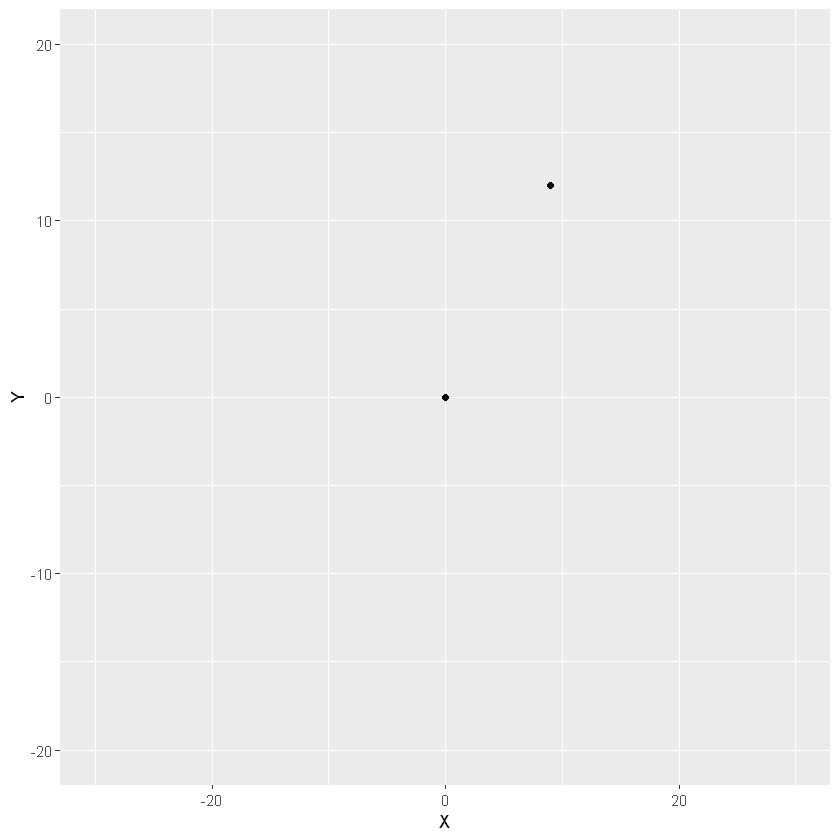

In [9]:
# Plot the positions of the players
ggplot(two_players, aes(x = X, y = Y)) + 
  geom_point() +
  # Assuming a 40x60 field
  lims(x = c(-30,30), y = c(-20, 20))



In [11]:
# Split the players data frame into two observations
player1 <- two_players[1, ]
player2 <- two_players[2, ]

# Calculate and print their distance using the Euclidean Distance formula
player_distance <- sqrt( (player1$X - player2$X)^2 + (player1$Y - player2$Y)^2 )
player_distance

[1] 15

The dist() function makes life easier when working with many dimensions and observations.

In [12]:
dist(three_players)

         1        2
2 15.00000         
3 19.10497 13.03840

In [13]:
three_players

X,Y
0,0
9,12
-2,19


## The importance of scale

 when a variable is on a larger scale than other variables in data it may disproportionately influence the resulting distance calculated between the observations. 
 
 `scale()` function by default centers & scales column features.

## Measuring distance for categorical data

### Dummication in R
`dummy.data.frame()`

In [32]:
job_survey = read.csv("datasets/job_survey.csv")
job_survey

job_satisfaction,is_happy
Low,No
Low,No
Hi,Yes
Low,No
Mid,No


In [33]:
# Dummify the Survey Data
dummy_survey <- dummy.data.frame(job_survey)

# Calculate the Distance
dist_survey <- dist(dummy_survey, method="binary")
# Print the Distance Matrix
dist_survey

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"

          1         2         3         4
2 0.0000000                              
3 1.0000000 1.0000000                    
4 0.0000000 0.0000000 1.0000000          
5 0.6666667 0.6666667 1.0000000 0.6666667

this distance metric successfully captured that observations 1 and 2 are identical (distance of 0)